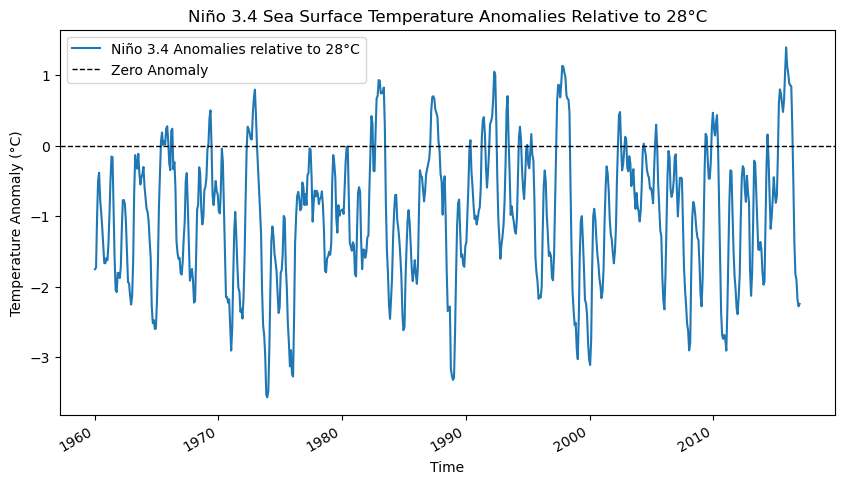

In [26]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

nino34_region = ds['sst'].sel(lat=slice(-5, 5), lon=slice(190, 240))

climatology = nino34_region.groupby('time.month').mean(dim='time')

anomalies_relative_to_28 = nino34_region - 28
ds.close()

plt.figure(figsize=(10, 5))
anomalies_relative_to_28.mean(dim=['lat', 'lon']).plot(label='Niño 3.4 Anomalies relative to 28°C')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Anomaly')
plt.title('Niño 3.4 Sea Surface Temperature Anomalies Relative to 28°C')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show() 

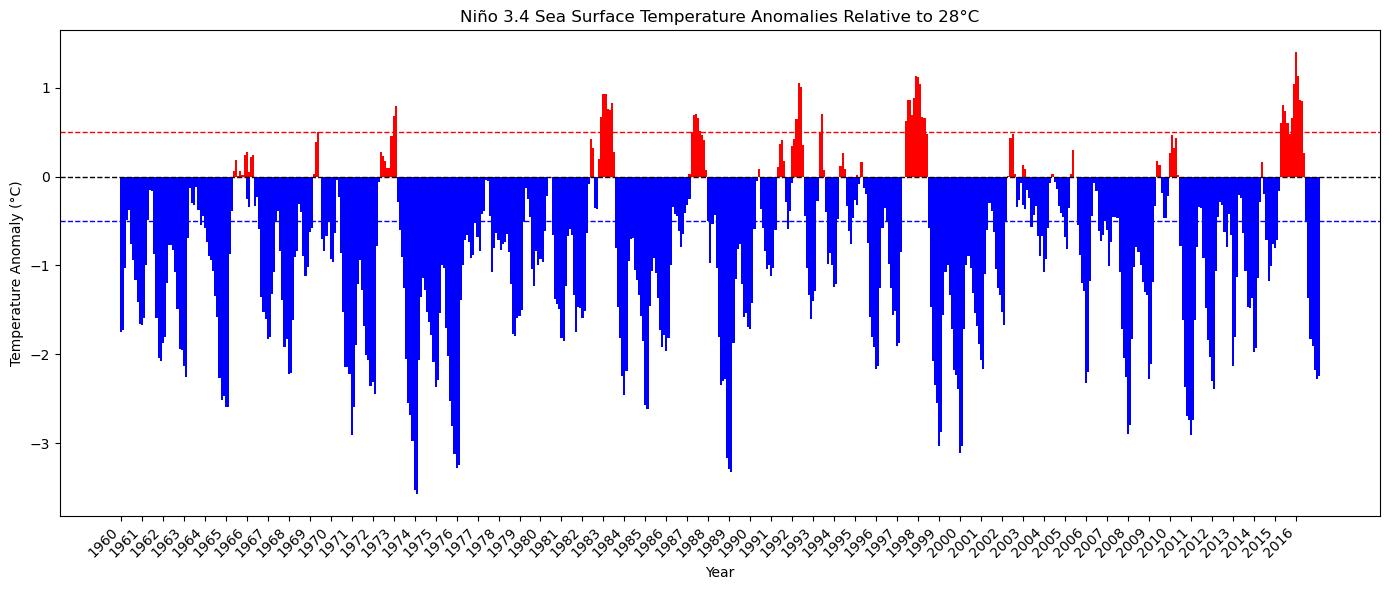

In [63]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

nino34_region = ds['sst'].sel(lat=slice(-5, 5), lon=slice(190, 240))

climatology = nino34_region.groupby('time.month').mean(dim='time')

anomalies_relative_to_28 = nino34_region - 28

ds.close()

mean_anomalies_df = anomalies_relative_to_28.mean(dim=['lat', 'lon']).to_dataframe(name='Temperature Anomaly (°C)')

mean_anomalies_df['Year'] = mean_anomalies_df.index.year
mean_anomalies_df['Month'] = mean_anomalies_df.index.month

mean_anomalies_pivot = mean_anomalies_df.pivot_table(values='Temperature Anomaly (°C)', index='Year', columns='Month')

fig, ax = plt.subplots(figsize=(14, 6))

colors = np.where(mean_anomalies_pivot > 0, 'red', 'blue')

bar_width = 0.1
for i, (colname, color) in enumerate(zip(mean_anomalies_pivot.columns, colors.T)):
    bars = ax.bar(mean_anomalies_pivot.index.astype(int) + i * bar_width, mean_anomalies_pivot[colname], width=bar_width, color=color, label=colname)

plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='Positive 0.5 Anomaly')
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=1, label='Negative 0.5 Anomaly')

plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Anomaly')
plt.title('Niño 3.4 Sea Surface Temperature Anomalies Relative to 28°C')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(mean_anomalies_pivot.index.astype(int), rotation=45, ha='right')
plt.tight_layout()
plt.show()


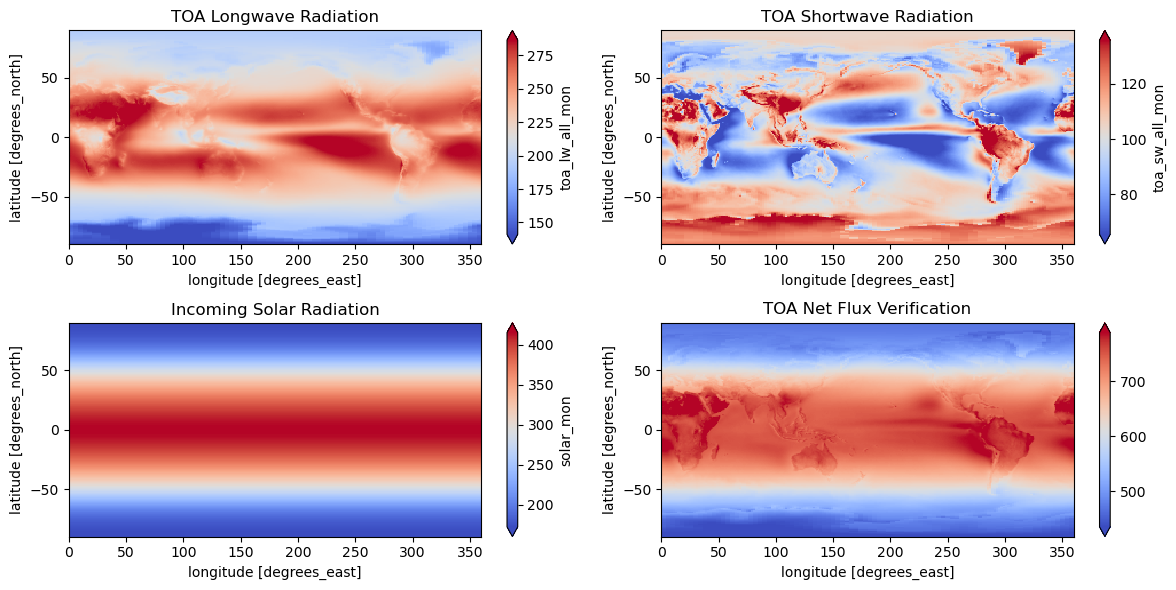

In [72]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

file_path = "CERES_EBAF-TOA_200003-201701.nc"
data = xr.open_dataset(file_path)

toalw_mean = data['toa_lw_all_mon'].mean(dim='time')
toasw_mean = data['toa_sw_all_mon'].mean(dim='time')
solar_mean = data['solar_mon'].mean(dim='time')

net_flux_verification = toalw_mean + toasw_mean + solar_mean
net_flux = data['toa_net_all_mon'].mean(dim='time')

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
toalw_mean.plot(cmap='coolwarm', robust=True)
plt.title('TOA Longwave Radiation')

plt.subplot(2, 2, 2)
toasw_mean.plot(cmap='coolwarm', robust=True)
plt.title('TOA Shortwave Radiation')

plt.subplot(2, 2, 3)
solar_mean.plot(cmap='coolwarm', robust=True)
plt.title('Incoming Solar Radiation')

plt.subplot(2, 2, 4)
net_flux_verification.plot(cmap='coolwarm', robust=True)
plt.title('TOA Net Flux Verification')

plt.tight_layout()
plt.show()

In [103]:

area_weights = np.cos(np.radians(ds['lat']))  

toa_incoming_solar = (ds['solar_mon'] * area_weights).sum(dim=['lat', 'lon']) / area_weights.sum()
toa_outgoing_lw = (ds['toa_lw_all_mon'] * area_weights).sum(dim=['lat', 'lon']) / area_weights.sum()
toa_outgoing_sw = (ds['toa_sw_all_mon'] * area_weights).sum(dim=['lat', 'lon']) / area_weights.sum()

tolerance = 1e-4 
assert np.all(np.abs(diff) < tolerance), f"Differences exceed tolerance: {diff}"

AssertionError: Differences exceed tolerance: <xarray.DataArray (time: 203)>
array([ 2267.8672  ,   835.45703 , -2097.082   , -3631.5156  ,
       -3054.336   , -1766.5586  ,  -270.23438 ,   715.47656 ,
        1643.1875  ,  2312.1836  ,  3634.0117  ,  3335.4766  ,
        2795.6914  ,   438.66797 , -2171.5273  , -3252.5156  ,
       -3024.0117  , -2143.7188  ,    45.753906,   494.03125 ,
        1411.3047  ,  1975.3242  ,  2878.9492  ,  2947.7266  ,
        2542.4844  ,   306.66797 , -1982.6055  , -3606.0977  ,
       -3595.7344  , -2311.832   ,  -321.71875 ,  1032.5234  ,
        1354.5234  ,  2310.6484  ,  2813.664   ,  3268.9336  ,
        2402.1055  ,   552.7383  , -2094.6992  , -3344.5625  ,
       -3150.1562  , -1623.1055  ,  -114.85547 ,   665.6328  ,
        1426.1641  ,  2283.2031  ,  3183.336   ,  3357.0742  ,
        2103.5625  ,   942.41406 , -2259.4102  , -3726.7422  ,
       -2772.9688  , -1796.918   ,    82.72266 ,   761.01953 ,
        1589.1797  ,  2714.7227  ,  2967.8281  ,  2902.6836  ,
        2474.2656  ,   491.14844 , -1482.0469  , -3513.4883  ,
       -3489.289   , -2060.918   ,  -146.02344 ,   628.41797 ,
        1369.6133  ,  2644.1367  ,  3302.4648  ,  3395.5898  ,
        2476.6992  ,   950.5     , -1457.3594  , -3268.0938  ,
       -3304.9648  , -2016.9766  ,   -91.21094 ,   530.8711  ,
...
       -3313.6914  , -2101.1445  ,  -241.52734 ,   645.6406  ,
        1041.2344  ,  2173.5312  ,  3164.8828  ,  3152.0625  ,
        2574.      ,   958.72266 , -1459.4414  , -3362.6953  ,
       -3174.8281  , -1856.8555  ,  -390.26953 ,  1219.4414  ,
        1523.7734  ,  1861.4883  ,  3228.1914  ,  3935.4102  ,
        2520.9805  ,  1026.6641  , -1432.3281  , -3088.5742  ,
       -2886.0938  , -1544.2109  ,  -130.7461  ,  1054.5117  ,
        1726.668   ,  2690.832   ,  2520.6367  ,  3155.3672  ,
        2756.5664  ,   575.8789  , -1641.0156  , -3386.9258  ,
       -2954.9297  , -1700.8047  ,  -194.91797 ,   650.58984 ,
        1468.5078  ,  2343.2617  ,  2883.504   ,  3103.0312  ,
        2617.621   ,   935.3008  , -1491.125   , -3410.3945  ,
       -3331.3945  , -1450.7461  ,    23.558594,   872.8789  ,
        1557.8047  ,  2235.0156  ,  2740.0352  ,  3408.1445  ,
        2658.3008  ,   926.2539  , -1475.7539  , -3152.75    ,
       -2845.2812  , -1442.7344  ,   171.19922 ,   926.2969  ,
        1489.375   ,  2327.0781  ,  2948.5977  ,  2721.5664  ,
        2379.2578  ,   625.8672  , -1683.6602  , -2650.9062  ,
       -2885.0117  , -1589.9688  ,    12.722656,   839.3086  ,
        1816.4609  ,  2595.2383  ,  3355.6016  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15

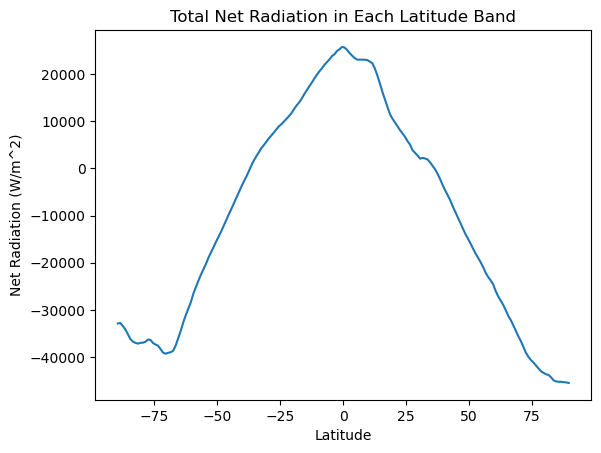

In [78]:
net_radiation_lat_band = data['toa_net_all_mon'].mean(dim='time').sum(dim='lon')
net_radiation_lat_band.plot()
plt.title('Total Net Radiation in Each Latitude Band')
plt.xlabel('Latitude')
plt.ylabel('Net Radiation (W/m^2)')
plt.show()

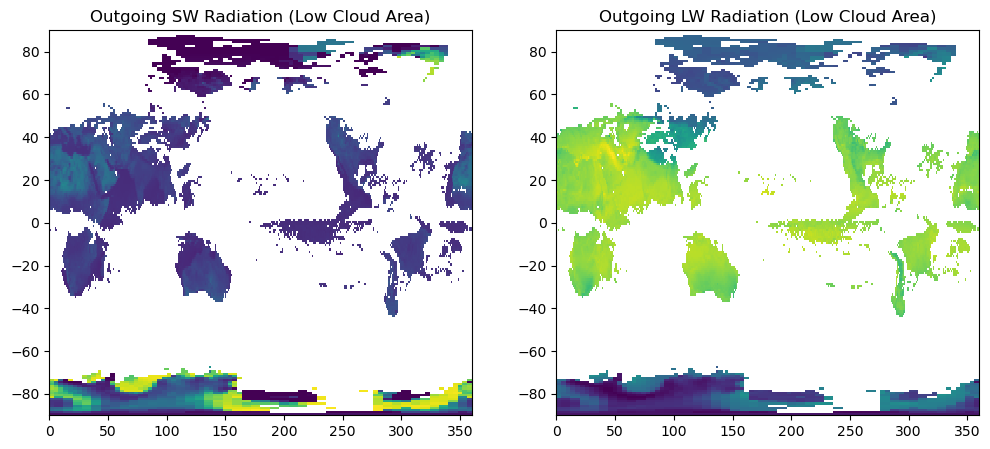

In [104]:
low_cloud_mask = ds['cldarea_total_daynight_mon'] <= 25
high_cloud_mask = ds['cldarea_total_daynight_mon'] >= 75

outgoing_sw_low = ds['toa_sw_all_mon'].where(low_cloud_mask).mean(dim='time')
outgoing_sw_high = ds['toa_sw_all_mon'].where(high_cloud_mask).mean(dim='time')

outgoing_lw_low = ds['toa_lw_all_mon'].where(low_cloud_mask).mean(dim='time')
outgoing_lw_high = ds['toa_lw_all_mon'].where(high_cloud_mask).mean(dim='time')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pcolormesh(ds['lon'], ds['lat'], outgoing_sw_low, cmap='viridis')
axes[0].set_title('Outgoing SW Radiation (Low Cloud Area)')

axes[1].pcolormesh(ds['lon'], ds['lat'], outgoing_lw_low, cmap='viridis')
axes[1].set_title('Outgoing LW Radiation (Low Cloud Area)')

plt.show()


In [105]:
global_mean_sw_low = (ds['toa_sw_all_mon'].where(low_cloud_mask) * area_weights).sum() / area_weights.sum()
global_mean_lw_low = (ds['toa_lw_all_mon'].where(low_cloud_mask) * area_weights).sum() / area_weights.sum()

global_mean_sw_high = (ds['toa_sw_all_mon'].where(high_cloud_mask) * area_weights).sum() / area_weights.sum()
global_mean_lw_high = (ds['toa_lw_all_mon'].where(high_cloud_mask) * area_weights).sum() / area_weights.sum()

print(f'Global Mean SW Radiation (Low Cloud): {global_mean_sw_low.values} W/m^2')
print(f'Global Mean LW Radiation (Low Cloud): {global_mean_lw_low.values} W/m^2')
print(f'Global Mean SW Radiation (High Cloud): {global_mean_sw_high.values} W/m^2')
print(f'Global Mean LW Radiation (High Cloud): {global_mean_lw_high.values} W/m^2')

Global Mean SW Radiation (Low Cloud): 289804.53125 W/m^2
Global Mean LW Radiation (Low Cloud): 891113.3125 W/m^2
Global Mean SW Radiation (High Cloud): 3567779.0 W/m^2
Global Mean LW Radiation (High Cloud): 7025346.0 W/m^2


In [86]:
import xarray as xr

file_path = "CERES_EBAF-TOA_200003-201701.nc"
data = xr.open_dataset(file_path)

print("Variables (Keys):")
print(list(data.variables))

print("\nDate Range:")
print(data['time'].min().values, "to", data['time'].max().values)

data.close()

Variables (Keys):
['lon', 'toa_sw_all_mon', 'toa_lw_all_mon', 'toa_net_all_mon', 'toa_sw_clr_mon', 'toa_lw_clr_mon', 'toa_net_clr_mon', 'toa_cre_sw_mon', 'toa_cre_lw_mon', 'toa_cre_net_mon', 'solar_mon', 'cldarea_total_daynight_mon', 'cldpress_total_daynight_mon', 'cldtemp_total_daynight_mon', 'cldtau_total_day_mon', 'time', 'lat']

Date Range:
2000-03-15T00:00:00.000000000 to 2017-01-15T00:00:00.000000000


In [96]:
print(data)

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 57.13 57.13 ... 0.0
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_

In [107]:
import xarray as xr

file_path = "pr_2021_YM.nc"
data = xr.open_dataset(file_path, engine='netcdf4')
print(data)

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 600, time: 12)
Coordinates:
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * time     (time) datetime64[ns] 2021-01-31 2021-02-28 ... 2021-12-31
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/...
    history:      Sun Oct 08 02:50:56 2023: cdo -b f64 ymonmean pr_2021.nc pr...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...


In [108]:
print(data.variables)

Frozen({'lon': <xarray.IndexVariable 'lon' (lon: 1440)>
array([1.25000e-01, 3.75000e-01, 6.25000e-01, ..., 3.59375e+02, 3.59625e+02,
       3.59875e+02])
Attributes:
    axis:     X, 'lat': <xarray.IndexVariable 'lat' (lat: 600)>
array([-59.875, -59.625, -59.375, ...,  89.375,  89.625,  89.875])
Attributes:
    axis:     Y, 'time': <xarray.IndexVariable 'time' (time: 12)>
array(['2021-01-31T00:00:00.000000000', '2021-02-28T00:00:00.000000000',
       '2021-03-31T00:00:00.000000000', '2021-04-30T00:00:00.000000000',
       '2021-05-31T00:00:00.000000000', '2021-06-30T00:00:00.000000000',
       '2021-07-31T00:00:00.000000000', '2021-08-31T00:00:00.000000000',
       '2021-09-30T00:00:00.000000000', '2021-10-31T00:00:00.000000000',
       '2021-11-30T00:00:00.000000000', '2021-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'pr': <xarray.Variable (time: 12, lat: 600, lon: 1440)>
[10368000 values with dtype=float64]})


C:\Users\jiaji\AppData\Local\Temp\ipykernel_22276\3433713628.py:21: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


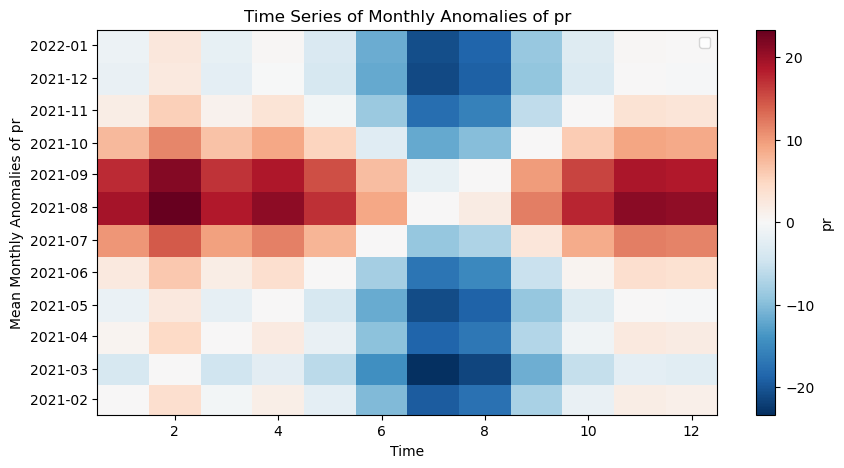

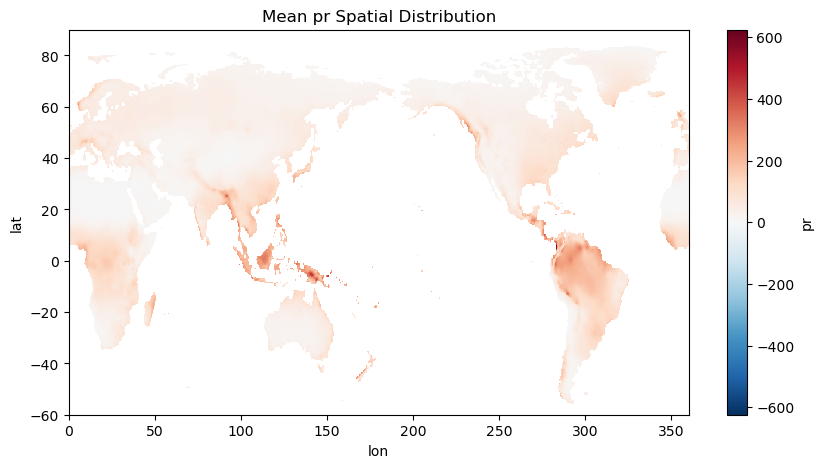

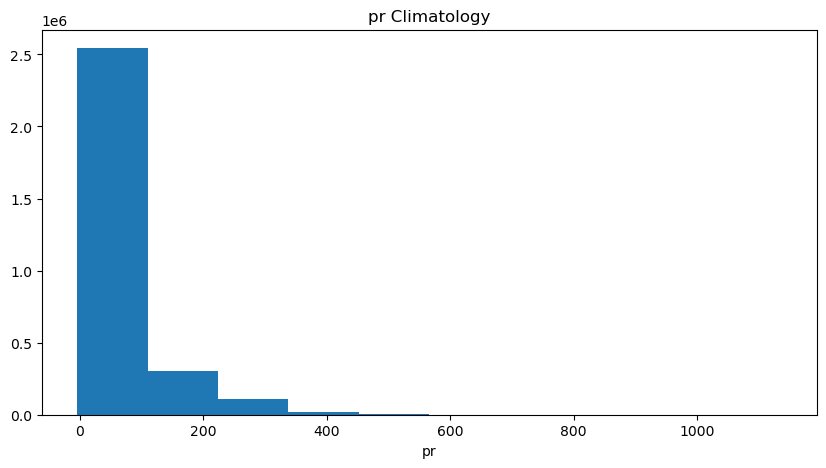

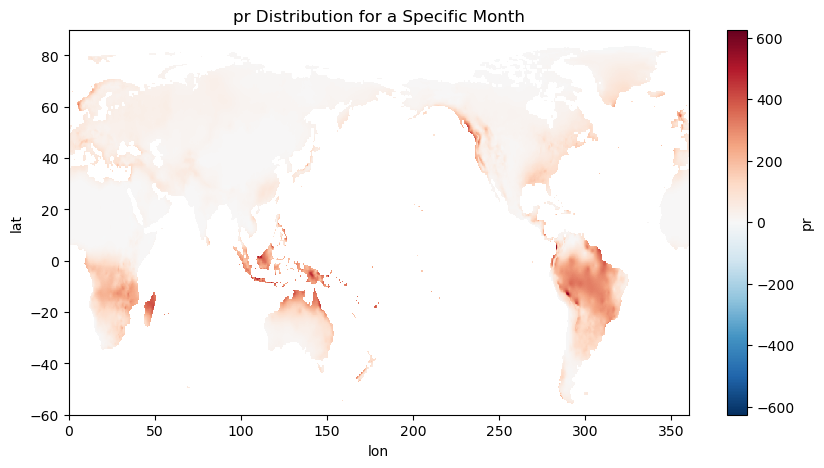

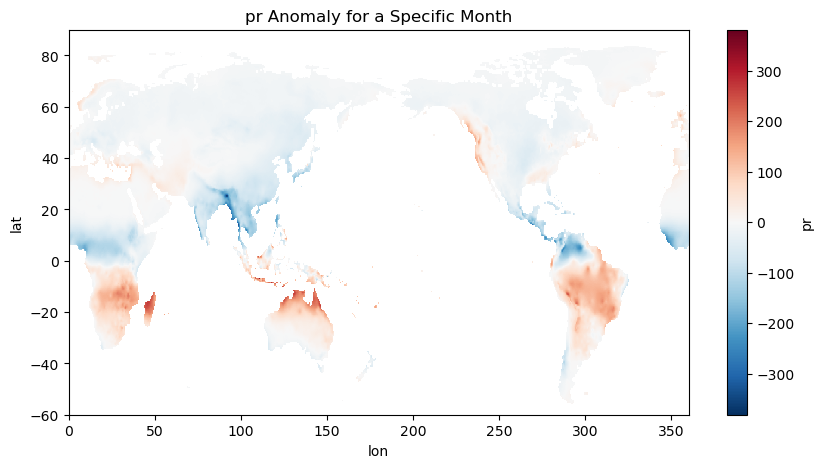

ValueError: array must not contain infs or NaNs

<Figure size 1000x500 with 0 Axes>

In [124]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
file_path = "pr_2021_YM.nc"
data = xr.open_dataset(file_path)

plt.figure(figsize=(10, 5))

# 3.1Calculate the monthly climatology and subtract it from the data
climatology = pr_variable.groupby('time.month').mean('time')
anomalies = pr_variable - climatology

anomalies.mean(dim=('lat', 'lon')).plot(label=f'Monthly Anomalies of {variable_name}')
plt.title(f'Time Series of Monthly Anomalies of {variable_name}')
plt.xlabel('Time')
plt.ylabel(f'Mean Monthly Anomalies of {variable_name}')
plt.legend()
plt.show()

# 3.2 Make at least 5 different plots using the dataset
plt.figure(figsize=(10, 5))
pr_variable.mean(dim='time').plot()
plt.title(f'Mean {variable_name} Spatial Distribution')
plt.show()
plt.figure(figsize=(10, 5))
pr_variable.groupby('time.month').mean(dim='time').plot()
plt.title(f'{variable_name} Climatology')
plt.show()

# Plot 3: Precipitation distribution across latitudes for a specific month
plt.figure(figsize=(10, 5))
pr_variable.isel(time=0).plot(y='lat')
plt.title(f'{variable_name} Distribution for a Specific Month')
plt.show()

# Plot 4: Precipitation anomaly for a specific month
plt.figure(figsize=(10, 5))
(pr_variable.isel(time=0) - pr_variable.mean(dim='time')).plot()
plt.title(f'{variable_name} Anomaly for a Specific Month')
plt.show()

# Plot 5: 2D histogram of detrended precipitation values
plt.figure(figsize=(10, 5))

detrended_data = signal.detrend(pr_variable, axis=0)

plt.hist2d(lon_flat, lat_flat, weights=detrended_data.mean(dim='time').values.flatten(), bins=(50, 50), cmap='viridis')
plt.colorbar(label=f'Mean Detrended {variable_name}')
plt.title(f'2D Histogram of Mean Detrended {variable_name} Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
